# **Library yang digunakan**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# nanti nambahin library yang dibutuhkan

In [31]:
# Baca kedua file
train = pd.read_csv('copparisk/train.csv')
target = pd.read_csv('copparisk/target.csv')

# Gabungkan kolom target ke train
train['coppaRisk'] = target['coppaRisk']

# Simpan ke file baru
train.to_csv('train_with_target.csv', index=False)


In [20]:
df_coppa = pd.read_csv('train_with_target.csv')

df_coppa

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,26.266667,0.0,NaN,low,low,False
6996,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,23.800000,0.0,NaN,low,low,False
6997,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Personalization,10 - 50,GLOBAL,True,NaN,NaN,0.0,NaN,27.500000,NaN,NaN,medium,low,False
6998,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,10 - 50,GLOBAL,True,False,high,99.0,NaN,124.033333,0.0,NaN,low,low,False


In [21]:
df_coppa.info()
print(f'Jumlah duplikasi {df_coppa.duplicated().sum()}')
df_coppa.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
coppaRisk                             0
dtype: int64

# **Exploratory Data Analysis**

Jumlah duplikasi 0
Modus dari setiap fitur:
developerCountry                   ADDRESS NOT LISTED IN PLAYSTORE
countryCode                                                 GLOBAL
userRatingCount                                                0.0
primaryGenreName                                             Games
downloads                                                100 - 500
deviceType                                                  GLOBAL
hasPrivacyLink                                                True
hasTermsOfServiceLink                                        False
hasTermsOfServiceLinkRating                                   high
isCorporateEmailScore                                          0.0
adSpent                                                   0.007039
appAge                                                        41.0
averageUserRating                                              4.0
appContentBrandSafetyRating                                 medium
appDescriptionBran

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16564\1808551243.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_coppa_filled = df_coppa.fillna(modes)


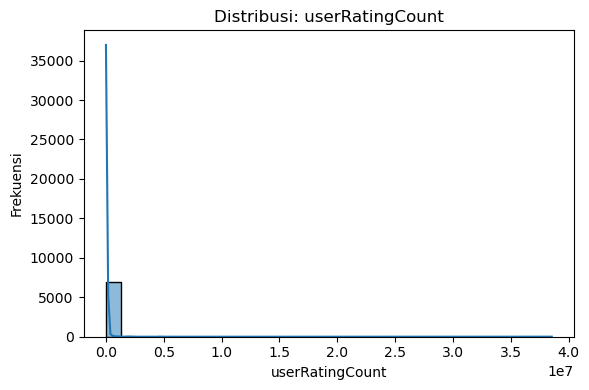

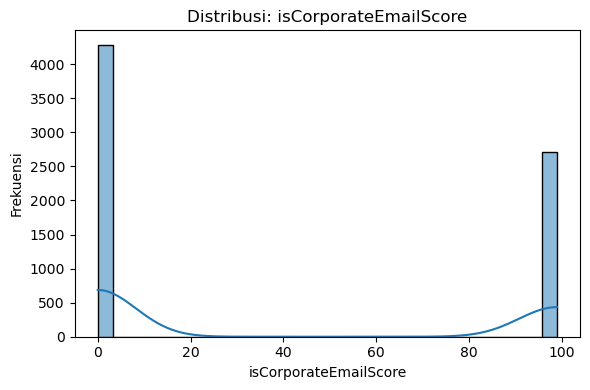

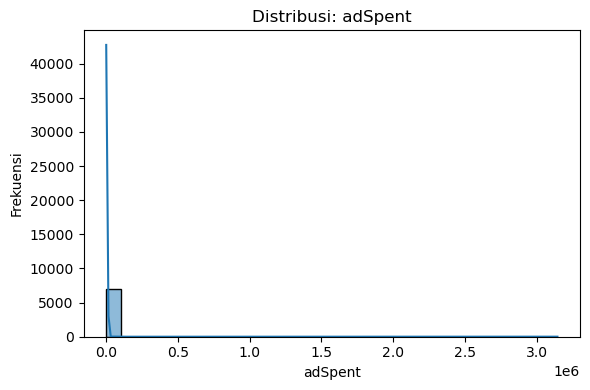

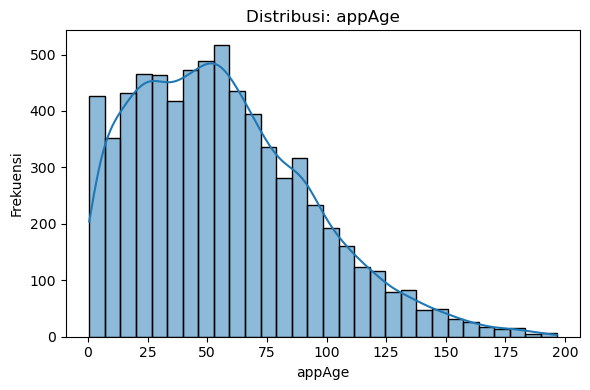

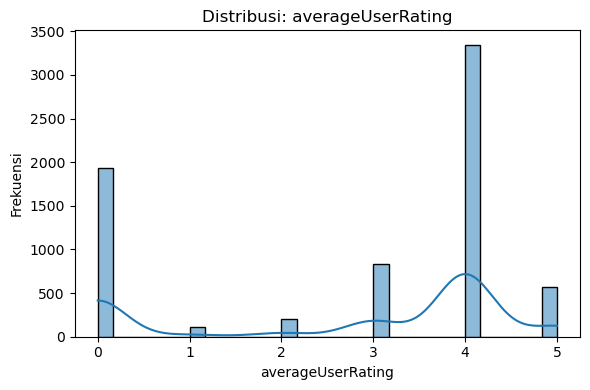

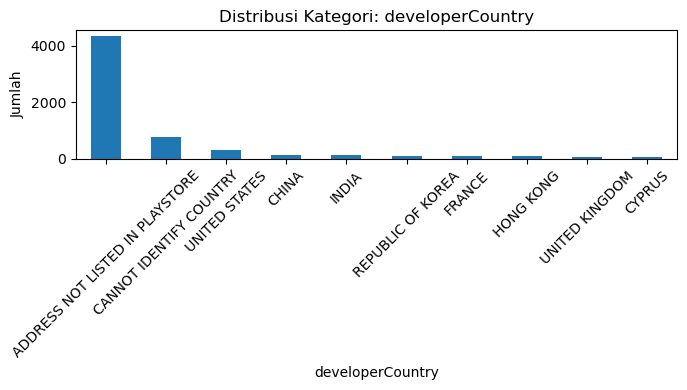

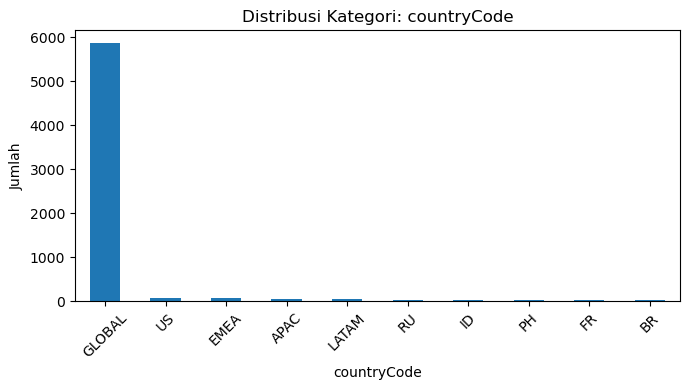

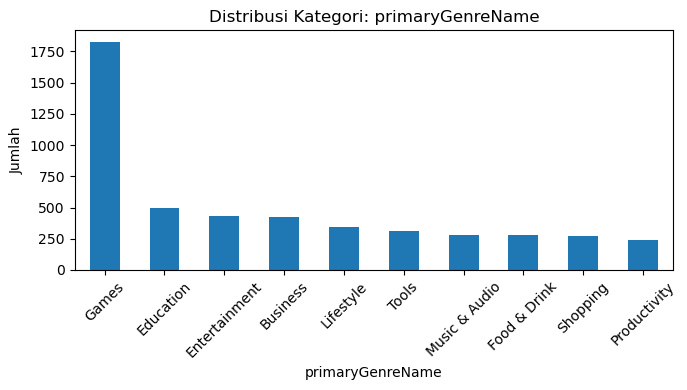

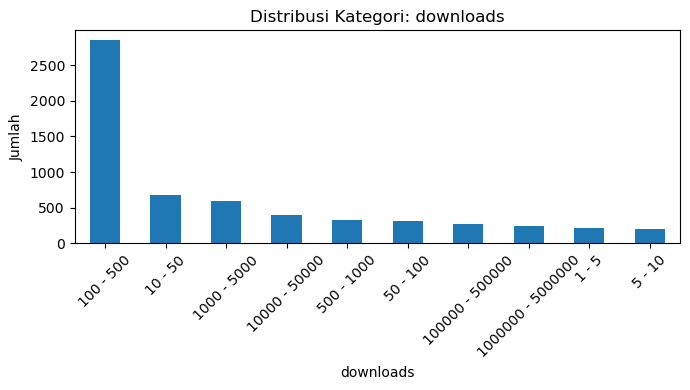

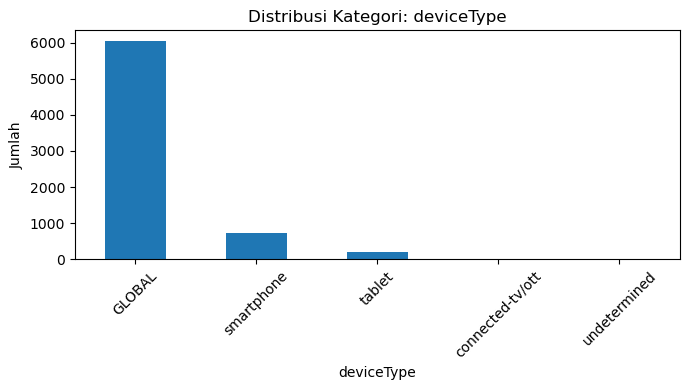

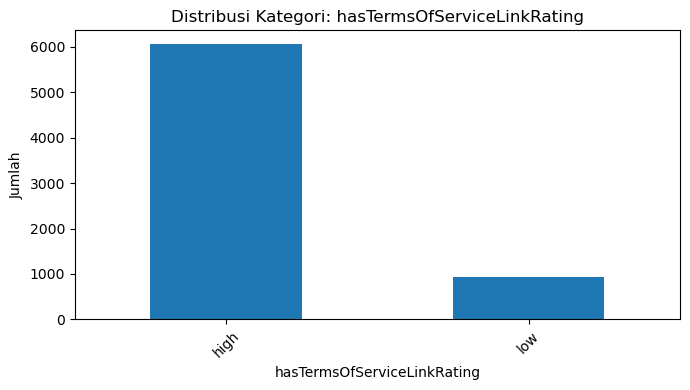

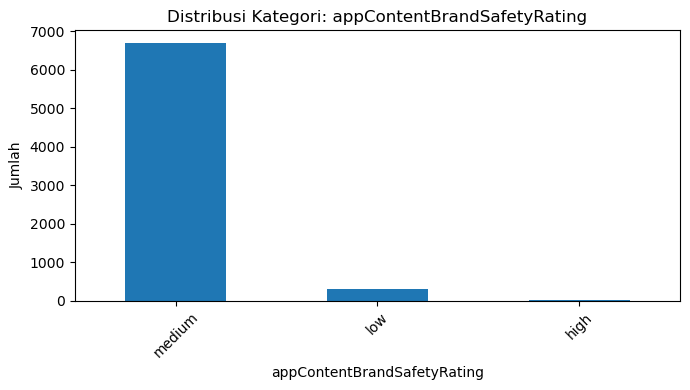

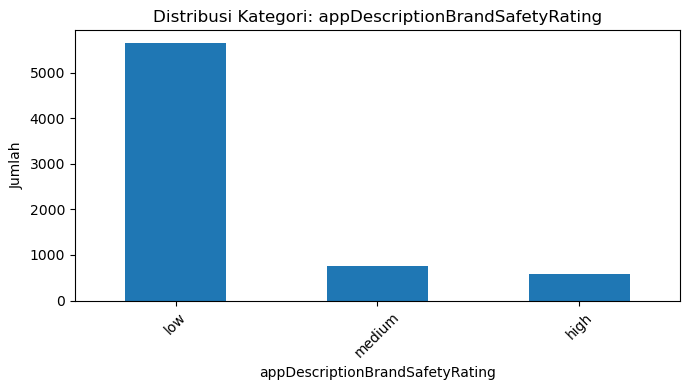

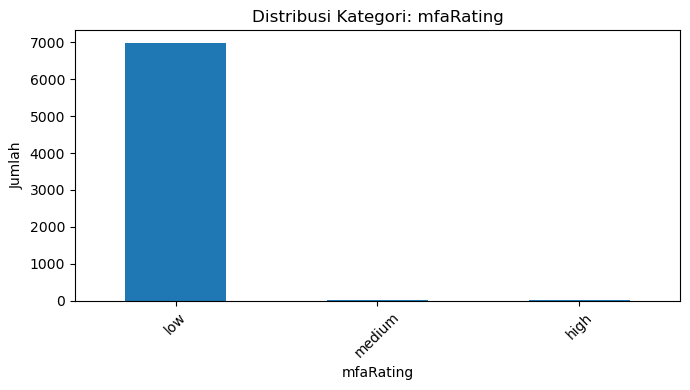

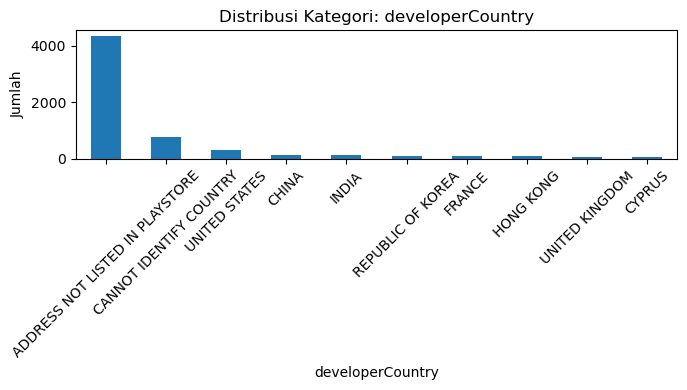

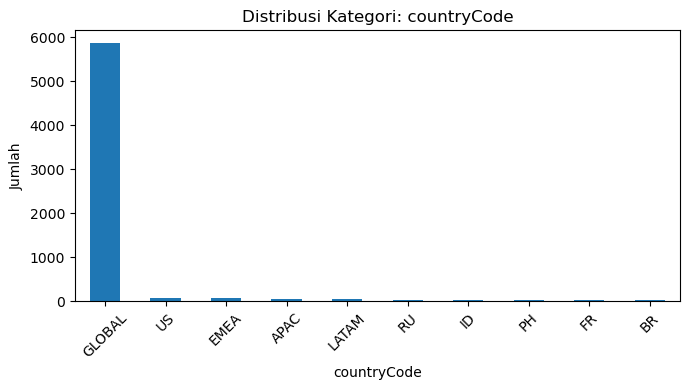

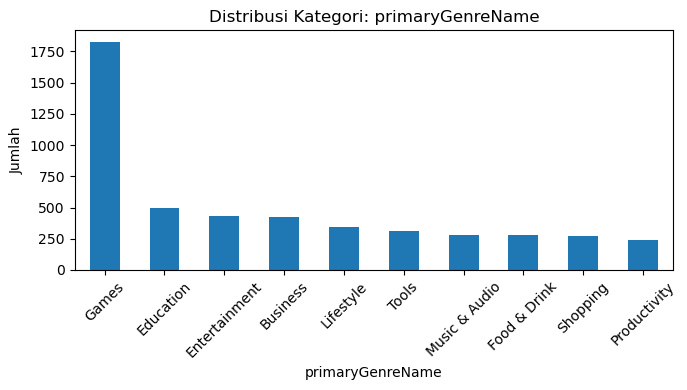

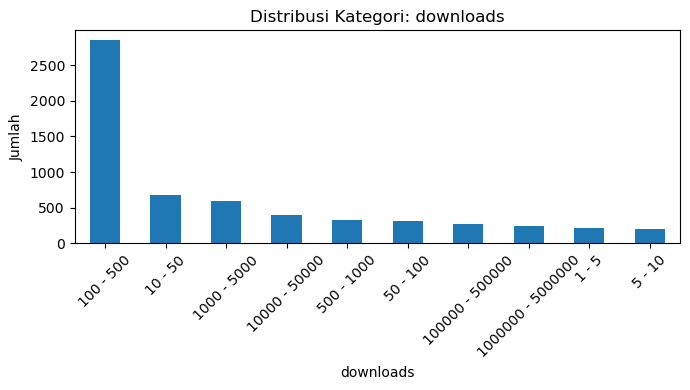

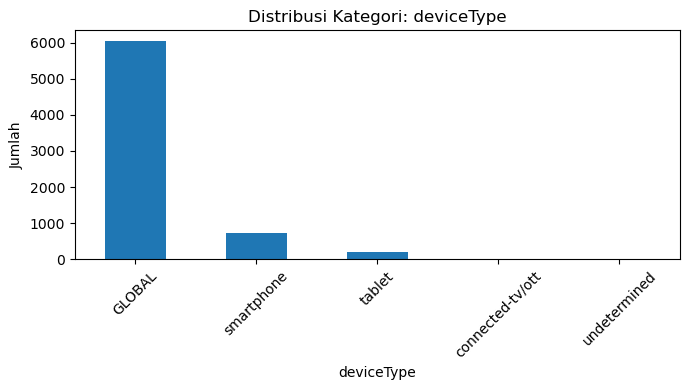

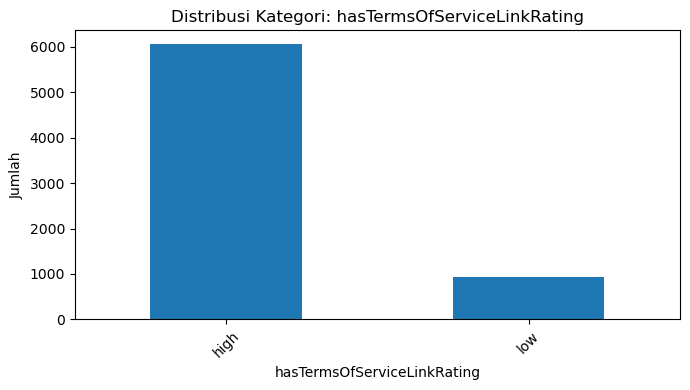

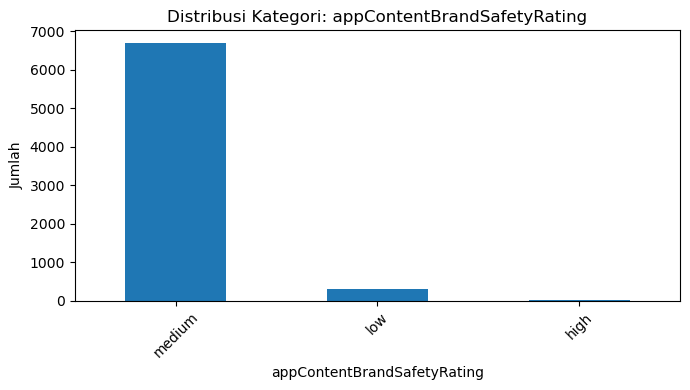

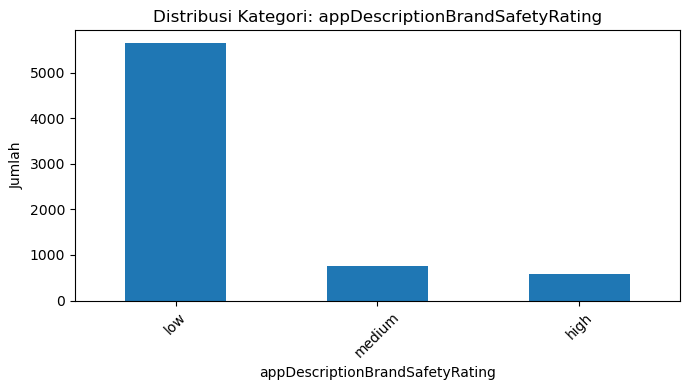

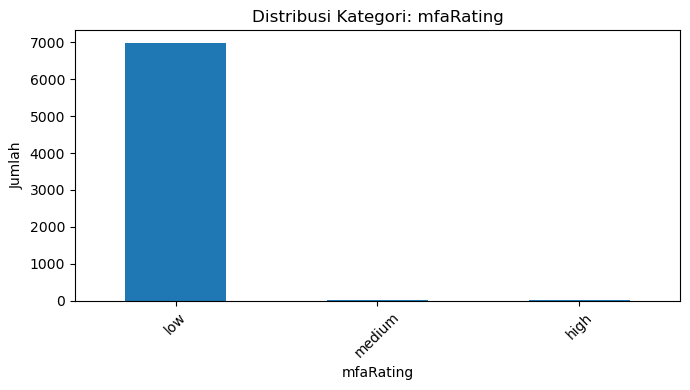

: 

In [ ]:

# Menghapus duplikasi total
df_coppa.drop_duplicates(inplace=True)
print(f'Jumlah duplikasi {df_coppa.duplicated().sum()}')

# Hitung modus dari setiap kolom
modes = df_coppa.mode().iloc[0]  # .mode() bisa hasilkan banyak baris kalau ada beberapa modus, jadi ambil yang pertama aja
'''
# Mencari modus (fitur countryCode) # Ini untuk mencari modus di satu fitur aja
modus = df_coppa['countryCode'].mode()
print(f'Modus: {modus[0]}')
'''
# Menampilkan hasilnya
print("Modus dari setiap fitur:")
print(modes)

# Ganti missing value dengan modus per kolom
df_coppa_filled = df_coppa.fillna(modes)

# Tampilkan jumlah missing value setelah diisi
print("\nMissing value setelah diisi:\n")
print(df_coppa_filled.isna().sum())

# Simpan hasilnya ke file baru
df_coppa_filled.to_csv('train_filled.csv', index=False)

# Cek tabel dalam data
df_coppa_filled

# Cek tabel distribusi
df_coppa_filled.describe()

# Cek pendistribusian dalam tabel numerikal
numerical_cols = df_coppa_filled.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_coppa_filled[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()
    
# Cek pendistiribusian dalam tabel kategorikal

categorical_cols = df_coppa_filled.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    df_coppa_filled[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Cek pendistribusian tabel target(coppaRisk)
categorical_cols = df_coppa_filled.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    df_coppa_filled[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()